In [1]:
#05_panda_04_20160812, Essential Functionality

In [2]:
from pandas import DataFrame,Series #from pandas import DataFrame, Series

In [3]:
import pandas as pd #慣例

In [4]:
import numpy as np #import numpy as np

In [5]:
import matplotlib.pyplot as plt #import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

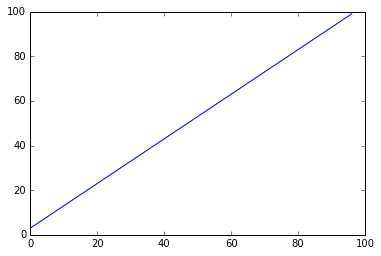

In [7]:
plt.plot(np.arange(3,100)) #plt.plot testing

In [8]:
#Essential Functionality of Series and DataFrame

In [9]:
#Reindexing

In [10]:
obj=Series([4.5,7.2,-5.2,3.2],index=['甲','乙','丙','丁']) 

In [11]:
obj

甲    4.5
乙    7.2
丙   -5.2
丁    3.2
dtype: float64

In [12]:
obj_02=obj.reindex(['丙','丁','戊','甲','乙']) #reindexing

In [13]:
obj_02 #如果reindexint 有原先不存在的 index '戊', --> NaN

丙   -5.2
丁    3.2
戊    NaN
甲    4.5
乙    7.2
dtype: float64

In [14]:
#reindex() method=ffill 選項

In [15]:
obj_03=Series(['藍','紅','白'],index=[0,2,4])

In [16]:
obj_03

0    藍
2    紅
4    白
dtype: object

In [17]:
obj_03.reindex(range(6),method='ffill')  #'ffil',forward fill 

0    藍
1    藍
2    紅
3    紅
4    白
5    白
dtype: object

In [18]:
#DataFrame reindex

In [19]:
frame_01=DataFrame(np.arange(9).reshape(3,3), index=['a','b','c'],
                  columns=['Kaohsiung','Taipei','Tainan'])

In [20]:
frame_01

,Kaohsiung,Taipei,Tainan
a,0,1,2
b,3,4,5
c,6,7,8


In [21]:
#numpy.reshape() method 說明

In [22]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [23]:
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [24]:
np.arange(9).reshape(1,9)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [25]:
#numpy.reshape() method 說明結束

In [26]:
frame_02=frame_01.reindex(['a','b','d','c']) #對frame_01 reindex, 不存在的-->NaN

In [27]:
frame_02

,Kaohsiung,Taipei,Tainan
a,0.0,1.0,2.0
b,3.0,4.0,5.0
d,NaN,NaN,NaN
c,6.0,7.0,8.0


In [28]:
citys=['Kaohsiung','Taipei','Hualien'] #list citys

In [29]:
frame_03=frame_01.reindex(columns=citys) #指名 columns 對 frame_01 reindexing

In [30]:
frame_03

,Kaohsiung,Taipei,Hualien
a,0,1,NaN
b,3,4,NaN
c,6,7,NaN


In [31]:
#同時對 index及column reindexing

In [32]:
frame_01.reindex(index=['a','b','c','d'],method='ffill',
                columns=citys)

,Kaohsiung,Taipei,Hualien
a,0,1,NaN
b,3,4,NaN
c,6,7,NaN
d,6,7,NaN


In [33]:
#使用 label-indexing with ix

In [34]:
frame_01.ix[['a','b','c','d'],citys]

,Kaohsiung,Taipei,Hualien
a,0.0,1.0,NaN
b,3.0,4.0,NaN
c,6.0,7.0,NaN
d,NaN,NaN,NaN


In [35]:
#reindex function arguments

In [36]:
#Dropping entries from an axis, drop() method, Series Object

In [37]:
obj_04=Series(np.arange(5.0),index=['甲','乙','丙','丁','戊'])

In [38]:
obj_04

甲    0.0
乙    1.0
丙    2.0
丁    3.0
戊    4.0
dtype: float64

In [39]:
new_obj=obj_04.drop('丁')

In [40]:
new_obj

甲    0.0
乙    1.0
丙    2.0
戊    4.0
dtype: float64

In [41]:
drop_list=['丁','戊']

In [42]:
new_obj=obj_04.drop(drop_list)

In [43]:
new_obj

甲    0.0
乙    1.0
丙    2.0
dtype: float64

In [44]:
#Dropping entries from an axis, drop() method, DataFrame Object

In [45]:
df1=DataFrame(np.arange(16).reshape(4,4),
              index=[2013,2014,2015,2016],
              columns=['KHS','TPE','TAN','HAN'])

In [46]:
df1

,KHS,TPE,TAN,HAN
2013,0,1,2,3
2014,4,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [47]:
df1.drop([2013,2014]) #drop index [2013,2014]

,KHS,TPE,TAN,HAN
2015,8,9,10,11
2016,12,13,14,15


In [48]:
df1.drop(['TAN','HAN'],axis=1) #沿軸1 (axis=1), 刪 ['TAN','HAN']  

,KHS,TPE
2013,0,1
2014,4,5
2015,8,9
2016,12,13


In [49]:
#Indexing, selection, and filtering

In [50]:
#Series indexing (obj[...]) works analogously to NumPy array indexing,
#except you can use the Series’s index values instead of only integers.

In [51]:
obj=Series(np.arange(4.0),index=['A','B','C','D']) #Series Object

In [52]:
obj

A    0.0
B    1.0
C    2.0
D    3.0
dtype: float64

In [53]:
obj[1] #可以用傳統的 offset 取值

1.0

In [54]:
obj['B'] #也可以直接用index label 取值

1.0

In [55]:
obj[1:3] #可以 [start:stop:step] 切片取值

B    1.0
C    2.0
dtype: float64

In [56]:
obj['A':'C'] #也可以用 index label 切片取值
             #但與 offset 不同的是, 包含端點

A    0.0
B    1.0
C    2.0
dtype: float64

In [57]:
obj[[1,3]] #offset 陣列 [1,3]

B    1.0
D    3.0
dtype: float64

In [58]:
obj[['A','C']] #index label 陣列 ['A','C']

A    0.0
C    2.0
dtype: float64

In [59]:
obj[obj>=2] #布林陣列 obj>=2

C    2.0
D    3.0
dtype: float64

In [60]:
#setting value

In [61]:
obj['A':'C']=99.0

In [62]:
obj

A    99.0
B    99.0
C    99.0
D     3.0
dtype: float64

In [63]:
#indexing into a DataFrame 

In [69]:
df1=DataFrame(np.arange(16).reshape(4,4),
             index=['2013','2014','2015','2016'],
             columns=['KHS','TPE','TAN','HUN'])

In [70]:
df1 #DataFrame Object

,KHS,TPE,TAN,HUN
2013,0,1,2,3
2014,4,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [74]:
df1['TPE'] #column 'TPE'

2013     1
2014     5
2015     9
2016    13
Name: TPE, dtype: int32

In [76]:
df1[['KHS','TAN']] #以list ['KHS','TAN'] 切取

,KHS,TAN
2013,0,2
2014,4,6
2015,8,10
2016,12,14


In [79]:
df1[0:2] #切 可以, df1[1] --> offset 不行

,KHS,TPE,TAN,HUN
2013,0,1,2,3
2014,4,5,6,7


In [81]:
df1[['KHS','TAN']][0:2] #這樣可以

,KHS,TAN
2013,0,2
2014,4,6


In [82]:
#布林陣列

In [83]:
df1

,KHS,TPE,TAN,HUN
2013,0,1,2,3
2014,4,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [84]:
df1[df1['TAN']>5]

,KHS,TPE,TAN,HUN
2014,4,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [85]:
#布林陣列 example 2:

In [86]:
df1 < 5 #產生一個布林 DataFrame

,KHS,TPE,TAN,HUN
2013,True,True,True,True
2014,True,False,False,False
2015,False,False,False,False
2016,False,False,False,False


In [87]:
df1[df1 < 5] = 99.0 #將布林DataFrame 套用

In [88]:
df1

,KHS,TPE,TAN,HUN
2013,99,99,99,99
2014,99,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [89]:
#special indexing field ix

In [90]:
df2=DataFrame(np.arange(16).reshape(4,4),
             index=['2013','2014','2015','2016'],
             columns=['KHS','TPE','TAN','HUN'])

In [91]:
df2

,KHS,TPE,TAN,HUN
2013,0,1,2,3
2014,4,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [93]:
df_ix01=df2.ix['2014',['KHS','TAN']]

In [94]:
type(df_ix01)

pandas.core.series.Series

In [95]:
df_ix01 #Series Object

KHS    4
TAN    6
Name: 2014, dtype: int32

In [97]:
df_ix02=df2.ix[['2014','2015'],['KHS','TAN']]

In [98]:
type(df_ix02)

pandas.core.frame.DataFrame

In [99]:
df_ix02 #DataFrame Object

,KHS,TAN
2014,4,6
2015,8,10


In [100]:
df2.ix[2] #offset 2, index '2015'

KHS     8
TPE     9
TAN    10
HUN    11
Name: 2015, dtype: int32

In [101]:
df2.ix['2015'] #結果同上

KHS     8
TPE     9
TAN    10
HUN    11
Name: 2015, dtype: int32

In [106]:
df2

,KHS,TPE,TAN,HUN
2013,0,1,2,3
2014,4,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [107]:
df2.ix[df2.TAN > 5] #df2, column 'TAN' values > 5

,KHS,TPE,TAN,HUN
2014,4,5,6,7
2015,8,9,10,11
2016,12,13,14,15


In [108]:
df2.ix[df2.TAN > 5, 0:3] #df2, column 'TAN' values > 5
                         #取前3個 columns

,KHS,TPE,TAN
2014,4,5,6
2015,8,9,10
2016,12,13,14
